In [28]:
# Classifying newswires: a multiclass classification example

# Load Reuters dataset
from keras.datasets import reuters

# Restricts data to 10,000 most frequently occuring words found in the dataset
# 8,982 training examples and 2,246 test examples
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [29]:
# Vectorize data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
        
    return results

# Vectorized training data
x_train = vectorize_sequences(train_data)

# Vectorized test data
x_test = vectorize_sequences(test_data)

In [30]:
# Vectorize labels using one-hot encoding

# One-hot encoding is a format for categorical data

# Embeds each label as an all-zero vector with a 1 in place of the label index
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):
        results[i, label] = 1
    
    return results

# Vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)

# Vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [31]:
# Model definition
from keras import models
from keras import layers

model = models.Sequential()

# 64 units are used as space to learn 46 different classes (46 dimensions)
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))

# 3rd layer has size 46 because it will input a 46-dimensional vector
# Each dimension in vector will encode a different output class
# Softmax activation is used to output a probability distribution over the 46 different 
# output classes, where output[i] is the probability that the sample belongs to class i.
model.add(layers.Dense(46, activation="softmax"))

In [32]:
# Compile model

# "categorical_crossentropy" is the loss function used because of how it minimizes the distance between the probability 
# distribution output by network and true distribution of labels
# Outputs something as close as possible to true labels
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
# Setting aside a validation set

# set apart 1,000 samples in training data to be used as validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Train model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 2.8828 - accuracy: 0.4211 - val_loss: 1.9807 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.6076 - accuracy: 0.6775 - val_loss: 1.3997 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.1921 - accuracy: 0.7437 - val_loss: 1.1916 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9679 - accuracy: 0.7909 - val_loss: 1.0694 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.7983 - accuracy: 0.8270 - val_loss: 1.0131 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.6678 - accuracy: 0.8576 - val_loss: 0.9366 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5580 - accuracy: 0.8831 - val_loss: 0.9148 - val_accuracy: 0.8060
Epoch 8/20
16

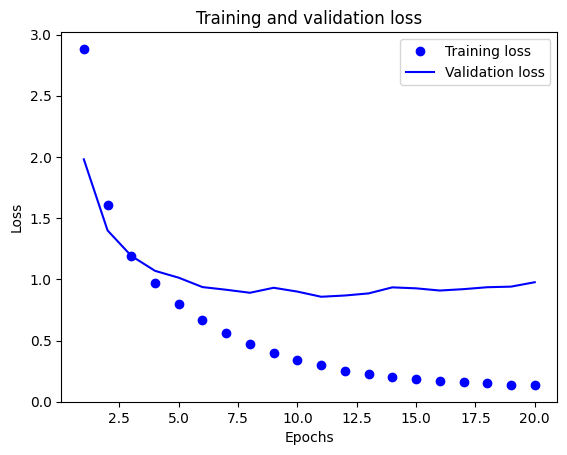

In [34]:
# Plot training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

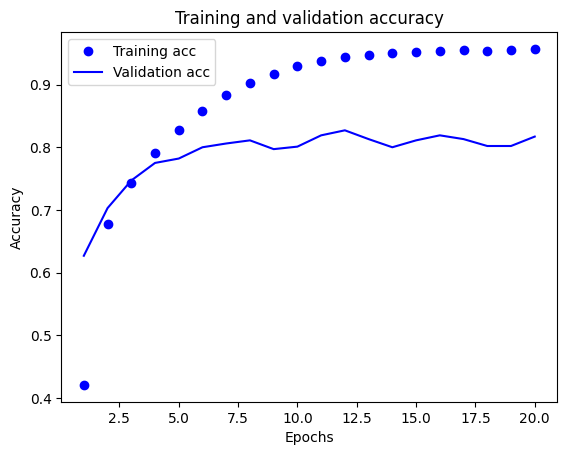

In [36]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

In [37]:
# Retrain model

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/9
16/16 [==============================] - 1s 37ms/step - loss: 2.6964 - accuracy: 0.4568 - val_loss: 1.8664 - val_accuracy: 0.6090
Epoch 2/9
16/16 [==============================] - 0s 21ms/step - loss: 1.5810 - accuracy: 0.6642 - val_loss: 1.4189 - val_accuracy: 0.6770
Epoch 3/9
16/16 [==============================] - 0s 19ms/step - loss: 1.2253 - accuracy: 0.7278 - val_loss: 1.2286 - val_accuracy: 0.7290
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 1.0056 - accuracy: 0.7786 - val_loss: 1.1085 - val_accuracy: 0.7580
Epoch 5/9
16/16 [==============================] - 0s 20ms/step - loss: 0.8433 - accuracy: 0.8165 - val_loss: 1.0200 - val_accuracy: 0.7850
Epoch 6/9
16/16 [==============================] - 0s 21ms/step - loss: 0.7050 - accuracy: 0.8463 - val_loss: 0.9816 - val_accuracy: 0.7870
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5940 - accuracy: 0.8747 - val_loss: 0.9384 - val_accuracy: 0.7950
Epoch 8/9
16/16 [===

[0.9732023477554321, 0.7822796106338501]